In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
# Load dataset (replace 'yourfile.csv' with your actual file)
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# Example: assuming 'feature' is the feature column and 'target' is the target column
X = df[['sepal_length']].values
y = df['petal_length'].values

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
scalar_X = StandardScaler()
X_train_scaled = scalar_X.fit_transform(X_train)
X_test_scaled = scalar_X.transform(X_test)

In [8]:
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).ravel()

In [9]:
svr = SVR(kernel='rbf', C=100, epsilon=0.1)

In [10]:
# Train the model
svr.fit(X_train_scaled, y_train_scaled)

SVR(C=100)

In [16]:
y_pred_scaled = svr.predict(X_test_scaled)

In [17]:
# Inverse transform the predictions and true values to original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
y_test_original = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).ravel()


In [18]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test_original, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 0.55


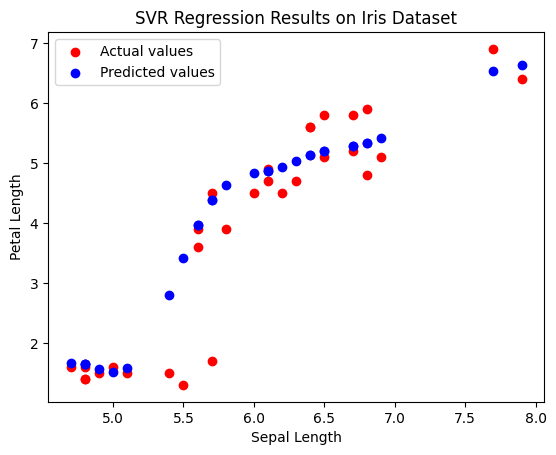

In [20]:
# Plotting results
plt.scatter(X_test, y_test_original, color='red', label='Actual values')
plt.scatter(X_test, y_pred, color='blue', label='Predicted values')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('SVR Regression Results on Iris Dataset')
plt.legend()
plt.show()

In [21]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.2],
    'kernel': ['linear', 'poly', 'rbf']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(SVR(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train_scaled)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)


Best parameters found:  {'C': 1, 'epsilon': 0.2, 'kernel': 'rbf'}
